In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
import matplotlib.font_manager
from matplotlib import rc
import matplotlib.colors as cor


rc('font', **{'family': 'monospace', 'monospace': ['Bitstream Vera Sans Mono']})
rc('text', usetex=True)

rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{wasysym}'+
    r'\usepackage[dvipsnames]{xcolor} \usepackage{graphicx} \usepackage{MnSymbol}  \usepackage{txfonts}')


def legendAsLatex(axes, rotation=90) :
    '''Generate a latex code to be used instead of the legend. 
       Uses the label, color, marker and linestyle provided to the pyplot.plot.
       The marker and the linestyle must be defined using the one or two character
           abreviations shown in the help of pyplot.plot.
       Rotation of the markers must be multiple of 90.
    '''
    latexLine = {'-':'\\textbf{\Large \scalebox{.5}[1]{-}\scalebox{.5}[1]{-}\scalebox{.5}[1]{-}}',
        '-.':'\\textbf{\Large $-$\:\!$\\boldsymbol{\cdot}$\:\!--}',
        '--':'\\textbf{\Large\scalebox{1}[1]{-}\scalebox{1}[1]{-}}',
         ':':'\\textbf{\Large \dots}'}
    latexSymbol = {'o':'medbullet', 'd':'filledmedlozenge', 's':'filledmedsquare',
        'D':'Diamondblack', '*':'bigstar', '+':'boldsymbol{\plus}',
        'x':'boldsymbol{\\times}', 'p':'pentagon', 'h':'hexagon',
        ',':'boldsymbol{\cdot}', '_':'boldsymbol{\minus}','<':'LHD',
        '>':'RHD','v':'blacktriangledown', '^':'blacktriangle'} 
    rot90=['^','<','v','>']
    di = [0,-1,2,1][rotation%360//90]
    latexSymbol.update({rot90[i]:latexSymbol[rot90[(i+di)%4]] for i in range(4)})
    return (' \\linebreak \hspace*{5.2mm}'.join(['\\textcolor[rgb]{'\
            + ','.join([str(x) for x in cor.to_rgb(handle.get_color())]) +'}{'
            + '$\\'+latexSymbol.get(handle.get_marker(),';')+'$'
            + latexLine.get(handle.get_linestyle(),'') + '} ' + label 
                for handle,label in zip(*axes.get_legend_handles_labels())]))

%matplotlib inline 

In [2]:
scale = [2**20,2**21,2**22,2**23,2**24,2**25,2**26,2**27,2**28]
LiveGraph = {}
LiveGraph['seek'] = \
[1.34E-7,1.77E-07,1.58E-07,3.40E-07,\
 2.36E-07,2.26E-07,2.27E-07,2.55E-07,2.71E-07]
LiveGraph['scan'] = \
[7.63E-09,2.10E-08,3.34E-08,3.19E-08,\
 3.31E-08,2.25E-08,2.78E-08,2.76E-08,3.84E-08]

LMDB = {}
LMDB['seek'] = \
[0.000000728,0.000000808,0.000000852,0.000001016,\
 0.00000114,0.000001278,0.00000141,0.000001452,0.000001492]
LMDB['scan'] = \
[0.00000014,0.000000144,0.000000176,0.00000011,\
0.000000144,0.000000148,0.000000124,0.000000344,0.000000208]

rocksDB = {}
rocksDB['seek'] = \
[0.000005294,0.000004956,0.000006558,0.000007777,\
0.00001044,0.000013499,0.000008892,0.000013241,0.000009305]
rocksDB['scan'] = \
[0.000000636,0.000000792,0.000001232,0.000001583,
0.000002881,0.000003248,0.000001923,0.000004332,0.000002624]


In [3]:
#!/usr/bin/env python3

params = {'legend.fontsize': 15,
          'lines.linewidth': 1,
          'pdf.fonttype': 42}
plt.rcParams.update(params)

fig, (ax2,ax) = plt.subplots(2,1,sharex=True)

fig.set_size_inches(4, 2.5)
fig.subplots_adjust(hspace = 0)

#latency_corun = [0.164245, 0.237357, 0.436652, 0.641406, 0.775183, 0.880378]
#latency_alone = [0.085618, 0.102867, 0.155946, 0.209481, 0.26169, 0.284247]

#time_pagerank = [11.252377, 12.556378, 13.143194, 13.312559, 13.461941, 13.500465]

ax.plot(scale, LiveGraph['seek'], '-o', color='black', label='LiveGraph seek')
ax.plot(scale, LiveGraph['scan'], '-d', color='black', label='LiveGraph scan')
ax.plot(scale, LMDB['scan'], '--d', color='black', label='LMDB scan')
ax.plot([],[], '--o', color='black', label='LMDB seek')
ax.plot([],[], ':o', color='black', label='RocksDB seek')
ax.plot([],[], ':d', color='black', label='RocksDB scan')


ax.set_xscale('log')
# ax.set_yscale('log')
#ax.set_xlim([0.8, 40])
ax.set_ylim([0, 4e-7])
#ax.set_xlabel('graph scale |V|', fontsize=15)
ax.set_xticks([2**20,2**22,2**24,2**26,2**28])
ax.set_xticklabels([r'$2^{20}$', r'$2^{22}$', r'$2^{24}$',  r'$2^{26}$', r'$2^{28}$'], fontsize=8)
#ax.set_yticks([0,1e-7,2e-7,3e-7,4e-7])
#ax.set_yticklabels(['0','1e-7','2e-7','3e-7',''], fontsize=15)
ax.tick_params(axis='x', which='both', top='off', bottom='off')

ax2.set_xscale('log')
# ax.set_yscale('log')
#ax.set_xlim([0.8, 40])
ax2.set_ylim([4e-7, 1.5e-5])
ax2.set_xticks([2**20,2**21,2**22,2**23,2**24,2**25,2**26,2**27,2**28])
ax2.set_xticklabels([r'$2^{20}$',r'$2^{21}$', r'$2^{22}$',r'$2^{23}$', r'$2^{24}$',r'$2^{25}$',  r'$2^{26}$',r'$2^{27}$', r'$2^{28}$'], fontsize=10)
ax2.set_yticks([4e-7,5e-6,1e-5,1.5e-5])
ax2.set_yticklabels(['.04','.5','1','1.5'], fontsize=8)
ax2.tick_params(axis='x', which='both', top='off', bottom='off')

ax2.plot(scale, LMDB['seek'], '--o', color='black', label='LMDB seek')
ax2.plot(scale, rocksDB['seek'], ':o', color='black', label='RocksDB seek')
ax2.plot(scale, rocksDB['scan'], ':d', color='black', label='RocksDB scan')


fig.text(0.5, 0.03, 'graph scale |V|', fontsize=15, ha='center', va='center')
fig.text(0.01, 0.5, 'operation time (s)',fontsize=15, ha='center', va='center', rotation='vertical')
fig.text(1.1, 0.5,legendAsLatex(ax),ha='center', va='center', rotation=270)
fig.text(0.16, .95, 'x$10^{-5}$', fontsize=10, ha='center', va='center')


'''
legend = ax.legend(loc='center right')
for legend_handle in legend.legendHandles:
    legend_handle.set_linewidth(1.0)
    legend_handle._legmarker.set_markersize(3)
    legend_handle.set_
'''

#ax_label = ax.twinx()
#ax_label.set_yticks([])
#ax_label.set_ylabel(legendAsLatex(ax))

#ax2_label = ax2.twinx()
#ax2_label.set_yticks([])
#ax2_label.set_ylabel(legendAsLatex(ax2))

#ax2.set_ylabel('/\substack'+legendAsLatex(ax)) 

#ax2.plot([1, 2, 4, 8, 16, 32], LiveGraph['seek'], '-o', color='grey', markerfacecolor='none', label='PageRank')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_xticklabels(['', '40K', '80K', '160K', '320K', '640K', '1.28M', ''], fontsize=15)
#legendAsLatex(ax2)
'''
legend = ax2.legend(loc='lower center')
for legend_handle in legend.legendHandles:
    legend_handle.set_linewidth(1.0)
    legend_handle._legmarker.set_markersize(3)
'''
# legend = ax.legend(loc='lower right')
# for legend_handle in legend.legendHandles:
#     legend_handle._legmarker.set_markersize(3)


#fig.tight_layout()

#fig.savefig('microbenchmarking.pdf')



/Users/aaell/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


"\nlegend = ax2.legend(loc='lower center')\nfor legend_handle in legend.legendHandles:\n    legend_handle.set_linewidth(1.0)\n    legend_handle._legmarker.set_markersize(3)\n"

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1117dc0d0> (for post_execute):


/Users/aaell/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

<Figure size 288x180 with 2 Axes>

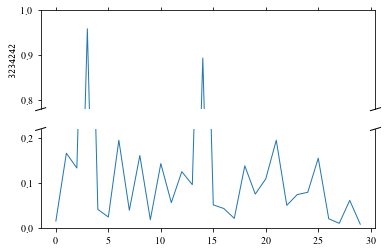

In [87]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.set_ylabel('3234242')

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

#ax3 = ax.twinx()


plt.show()

In [ ]:
help(fig.text)

In [4]:
#TAO out of core

"""

"""

num_clients = [24,32,48,64,96,128,256]
LiveGraph['TAO_out_core_througput_optane'] = \
[654696,650248,661465,670237,642060,650283,582159]
LiveGraph['TAO_out_core_latency_optane'] = \
[0.036202,0.048738,0.072038,0.094901,0.148764,0.19604,0.438808]
LiveGraph['TAO_out_core_througput_SSD'] = \
[239005,286815,367173,454882,527572,574182,588336]
LiveGraph['TAO_out_core_latency_SSD'] = \
[0.099467,0.110637,0.129866,0.139983,0.18143,0.222376,0.434517]


LMDB['TAO_out_core_througput_optane'] = \
[355063,386271,347025,345523,361682,381721,352536]
LMDB['TAO_out_core_latency_optane'] = \
[0.067157,0.082333,0.137692,0.184483,0.264684,0.334574,0.725444]
LMDB['TAO_out_core_througput_SSD'] = \
[143892,170226,222525,271607,309147,292773,317747]
LMDB['TAO_out_core_latency_SSD'] = \
[0.165806,0.187133,0.214841,0.235065,0.309949,0.436445,0.804881]


rocksDB['TAO_out_core_througput_optane'] = \
[508302,582832,583522,566824,574217,563535,None]
rocksDB['TAO_out_core_latency_optane'] = \
[.046834,0.054509,0.081791,0.112406,0.166632,0.226606,None]
rocksDB['TAO_out_core_througput_SSD'] = \
[167479,192251,263022,320711,371811,433313,None]
rocksDB['TAO_out_core_latency_SSD'] = \
[0.142591,0.165674,0.181746,0.198957,0.257671,0.294878,None]




In [5]:
#!/usr/bin/env python3

params = {'legend.fontsize': 15,
          'lines.linewidth': 1,
          'pdf.fonttype': 42}
plt.rcParams.update(params)

fig, (ax2,ax) = plt.subplots(2,1,sharex=True)

fig.set_size_inches(4, 2.5)
fig.subplots_adjust(hspace = 0)

#latency_corun = [0.164245, 0.237357, 0.436652, 0.641406, 0.775183, 0.880378]
#latency_alone = [0.085618, 0.102867, 0.155946, 0.209481, 0.26169, 0.284247]

#time_pagerank = [11.252377, 12.556378, 13.143194, 13.312559, 13.461941, 13.500465]

ax.plot(num_clients, LiveGraph['TAO_'+mem_type+'_througput_optane'], '-o', color='black', label='LiveGraph Optane')
ax.plot(num_clients, LiveGraph['TAO_'+mem_type+'_througput_SSD'], '-d', color='black', label='LiveGraph SSD')
ax.plot(num_clients, LMDB['TAO_'+mem_type+'_througput_optane'], '--o', color='black', label='LMDB Optane')
ax.plot(num_clients, LMDB['TAO_'+mem_type+'_througput_SSD'], '--d', color='black', label='LMDB SSD')
ax.plot(num_clients, rocksDB['TAO_'+mem_type+'_througput_optane'], ':o', color='black', label='LMDB Optane')
ax.plot(num_clients, rocksDB['TAO_'+mem_type+'_througput_SSD'], ':d', color='black', label='LMDB SSD')



ax.set_xscale('log')
# ax.set_yscale('log')
#ax.set_xlim([0.8, 40])
#ax.set_ylim([0, 4e-7])
#ax.set_xlabel('graph scale |V|', fontsize=15)
ax.set_xticks([num_clients])
#ax.set_xticklabels([r'$2^{20}$', r'$2^{22}$', r'$2^{24}$',  r'$2^{26}$', r'$2^{28}$'], fontsize=8)
#ax.set_yticks([0,1e-7,2e-7,3e-7,4e-7])
#ax.set_yticklabels(['0','1e-7','2e-7','3e-7',''], fontsize=15)
ax.tick_params(axis='x', which='both', top='off', bottom='off')

ax2.set_xscale('log')
# ax.set_yscale('log')
#ax.set_xlim([0.8, 40])
#ax2.set_ylim([4e-7, 1.5e-5])
#ax2.set_xticks([2**20,2**21,2**22,2**23,2**24,2**25,2**26,2**27,2**28])
#ax2.set_xticklabels([r'$2^{20}$',r'$2^{21}$', r'$2^{22}$',r'$2^{23}$', r'$2^{24}$',r'$2^{25}$',  r'$2^{26}$',r'$2^{27}$', r'$2^{28}$'], fontsize=10)
ax2.set_yticks([4e-7,5e-6,1e-5,1.5e-5])
ax2.set_yticklabels(['.04','.5','1','1.5'], fontsize=8)
ax2.tick_params(axis='x', which='both', top='off', bottom='off')

ax2.plot(num_clients, LiveGraph['TAO_'+mem_type+'_througput_optane'], '-o', color='black', label='LiveGraph Optane')
ax2.plot(num_clients, LiveGraph['TAO_'+mem_type+'_througput_SSD'], '-d', color='black', label='LiveGraph SSD')
ax2.plot(num_clients, LMDB['TAO_'+mem_type+'_througput_optane'], '--o', color='black', label='LMDB Optane')
ax2.plot(num_clients, LMDB['TAO_'+mem_type+'_througput_SSD'], '--d', color='black', label='LMDB SSD')
ax2.plot(num_clients, rocksDB['TAO_'+mem_type+'_througput_optane'], ':o', color='black', label='LMDB Optane')
ax2.plot(num_clients, rocksDB['TAO_'+mem_type+'_througput_SSD'], ':d', color='black', label='LMDB SSD')




fig.text(0.5, 0.03, 'graph scale |V|', fontsize=15, ha='center', va='center')
fig.text(0.01, 0.5, 'operation time (s)',fontsize=15, ha='center', va='center', rotation='vertical')
fig.text(1.1, 0.5,legendAsLatex(ax),ha='center', va='center', rotation=270)
fig.text(0.16, .95, 'x$10^{-5}$', fontsize=10, ha='center', va='center')


'''
legend = ax.legend(loc='center right')
for legend_handle in legend.legendHandles:
    legend_handle.set_linewidth(1.0)
    legend_handle._legmarker.set_markersize(3)
    legend_handle.set_
'''

#ax_label = ax.twinx()
#ax_label.set_yticks([])
#ax_label.set_ylabel(legendAsLatex(ax))

#ax2_label = ax2.twinx()
#ax2_label.set_yticks([])
#ax2_label.set_ylabel(legendAsLatex(ax2))

#ax2.set_ylabel('/\substack'+legendAsLatex(ax)) 

#ax2.plot([1, 2, 4, 8, 16, 32], LiveGraph['seek'], '-o', color='grey', markerfacecolor='none', label='PageRank')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_xticklabels(['', '40K', '80K', '160K', '320K', '640K', '1.28M', ''], fontsize=15)
#legendAsLatex(ax2)
'''
legend = ax2.legend(loc='lower center')
for legend_handle in legend.legendHandles:
    legend_handle.set_linewidth(1.0)
    legend_handle._legmarker.set_markersize(3)
'''
# legend = ax.legend(loc='lower right')
# for legend_handle in legend.legendHandles:
#     legend_handle._legmarker.set_markersize(3)


#fig.tight_layout()

#fig.savefig('TAO_latency_throughput_'+mem_type+'.pdf')




/Users/aaell/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


"\nlegend = ax2.legend(loc='lower center')\nfor legend_handle in legend.legendHandles:\n    legend_handle.set_linewidth(1.0)\n    legend_handle._legmarker.set_markersize(3)\n"

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11c3778c8> (for post_execute):


/Users/aaell/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

<Figure size 288x180 with 2 Axes>

In [ ]:

num_clients = [24,32,48,64,96,128,256]
LiveGraph['TAO_in_memory_througput_optane'] = \
[11791765,14123798,11986951,12050979,12646886,14293864,14173684]
LiveGraph['TAO_in_memory_latency_optane'] = \
[0.001765,0.001939,0.003573,0.004855,0.007068,0.00837,0.017226]
LiveGraph['TAO_in_memory_througput_SSD'] = \
[10401577,12305029,14157142,14147653,14420923,14782381,15151785]
LiveGraph['TAO_in_memory_latency_SSD'] = \
[0.002041,0.002294,0.002993,0.004087,0.006136,0.008108,0.016017]


LMDB['TAO_in_memory_througput_optane'] = \
[3025329,3237089,2932623,3001314,3002032,2987839,2988202]
LMDB['TAO_in_memory_latency_optane'] = \
[0.007636,0.009526,0.01592,0.020899,0.031548,0.042403,0.085217]
LMDB['TAO_in_memory_througput_SSD'] = \
[3018418,3136849,2848840,2919621,2882547,2851248,2861042]
LMDB['TAO_in_memory_latency_SSD'] = \
[0.007688,0.009847,0.01641,0.021449,0.032879,0.044464,0.089037]


rocksDB['TAO_in_memory_througput_optane'] = \
[788239,904098,1145004,1155019,1142348,1036424,1006685]
rocksDB['TAO_in_memory_latency_optane'] = \
[0.030163,0.035247,0.041494,0.054943,0.083538,0.122952,0.253736]
rocksDB['TAO_in_memory_througput_SSD'] = \
[752347,858987,1145510,1099251,1176810,1078579,1069054]
rocksDB['TAO_in_memory_latency_SSD'] = \
[0.031581,0.037062,0.041482,0.05776,0.081077,0.118132,0.238915]

mem_type = 'in_memory'


